# 12NME1 - Numerical methods 

### Assessment test 2022 - Solution

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

**Task 1:**

In [2]:
x_p = np.array([0.00, 0.45, 0.90, 1.35, 1.79, 2.24, 2.69, 3.14, 3.59, 4.04, 4.49, 4.93, 5.38, 5.83, 6.28])
y_p = np.array([2.74, 1.70, 1.57, 0.04, -1.30, -0.70, -1.36, -0.78, -0.50, -0.31, 1.63, 2.74, 2.78, 3.77, 1.39])

In [3]:
def least_squares(x, y):
    A = np.zeros((3, 3))
    b = np.zeros(3)
    phi = 2.0 * np.pi * (x - np.min(x)) / (np.max(x) - np.min(x))
    df_db = [
        1.0, 
        np.sin(phi),
        np.cos(phi)
    ]
    for j in range(3):
        b[j] = np.sum(y * df_db[j])
        A[j, 0] = np.sum(np.ones(np.size(x)) * df_db[j])
        A[j, 1] = np.sum(np.sin(phi) * df_db[j])
        A[j, 2] = np.sum(np.cos(phi) * df_db[j])  
    beta = la.solve(A, b)
    print("beta = ", beta)
    return lambda x: beta[0] + beta[1] * np.sin((2.0 * np.pi * (x - np.min(x)) / (np.max(x) - np.min(x)))) \
        + beta[2] * np.cos(2.0 * np.pi * (x - np.min(x)) / (np.max(x) - np.min(x)))

beta =  [ 0.77196238 -1.14238989  1.83056435]


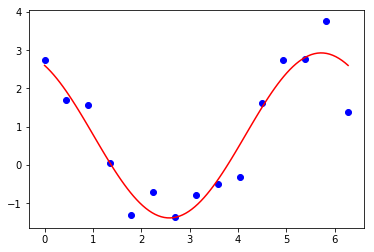

In [4]:
f = least_squares(x_p, y_p)
x = np.linspace(np.min(x_p), np.max(x_p), 100)

fig, ax = plt.subplots()
ax.scatter(x_p, y_p, color="blue")
ax.plot(x, f(x), color="red")

**Task 2:**

In [5]:
def runge_kutta_4(f, g, x_0, x_n, y_0, z_0, h):
    x = np.arange(x_0, x_n, h)
    n = np.size(x)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y_0
    z[0] = z_0
    for i in range(n - 1): 
        k_1 = f(x[i], y[i], z[i])
        l_1 = g(x[i], y[i], z[i])
        k_2 = f(x[i] + h / 2.0, y[i] + h / 2.0 * k_1, z[i] + h / 2.0 * l_1)
        l_2 = g(x[i] + h / 2.0, y[i] + h / 2.0 * k_1, z[i] + h / 2.0 * l_1)
        k_3 = f(x[i] + h / 2.0, y[i] + h / 2.0 * k_2, z[i] + h / 2.0 * l_2)
        l_3 = g(x[i] + h / 2.0, y[i] + h / 2.0 * k_2, z[i] + h / 2.0 * l_2)
        k_4 = f(x[i] + h, y[i] + h * k_3, z[i] + h * l_3)
        l_4 = g(x[i] + h, y[i] + h * k_3, z[i] + h * l_3)
        y[i+1] = y[i] + h / 6.0 * (k_1 + 2.0 * k_2 + 2.0 * k_3 + k_4)
        z[i+1] = z[i] + h / 6.0 * (l_1 + 2.0 * l_2 + 2.0 * l_3 + l_4)
    return x, y, z

y(25) =  1.3242443632584653 , z(25) =  -0.7602428319745838


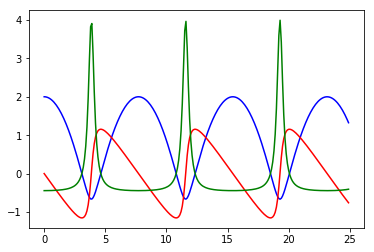

In [6]:
def f(x, y, z):
    return z

def g(x, y, z):
    return 1.0 / (2.0 * (1.0 + y)**2) - 0.5

x, y, z = runge_kutta_4(f, g, 0.0, 25.0, 2.0, 0.0, 0.1)
print("y(25) = ", y[-1], ", z(25) = ", z[-1])

fig, ax = plt.subplots()
ax.plot(x, y, color="blue")
ax.plot(x, z, color="red")
ax.plot(x, g(x, y, z), color="green")